In [35]:
#Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [40]:

data = pd.read_csv("/content/expenses.csv")
df = pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1322 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1322.000000,1338.000000,1338.000000
mean,39.207025,30.630609,1.094918,13270.422265
std,14.049960,6.096397,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.332500,1.000000,9382.033000
75%,51.000000,34.560000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


age          0
sex          0
bmi         16
children     0
smoker       0
region       0
charges      0
dtype: int64
There are no null values in the dataset
age          0
sex          0
bmi         16
children     0
smoker       0
region       0
charges      0
dtype: int64


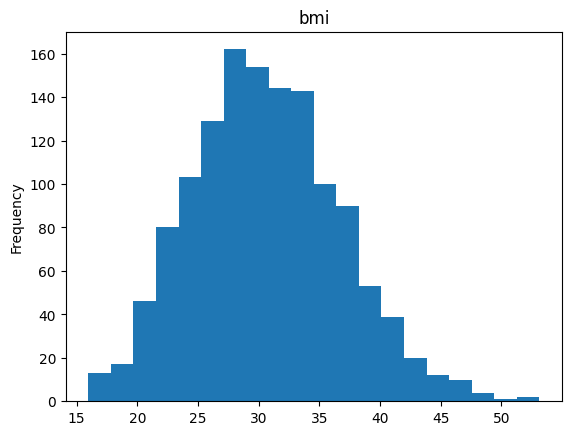

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [48]:
#1
import matplotlib.pyplot as plt
missingvalues = df.isnull().sum()
print(missingvalues)

df = df.dropna()
print("There are no null values in the dataset")

print(missingvalues)

df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.show()


df['bmi'] = df['bmi'].fillna(df['bmi'].median())


print(df.isnull().sum())

In [49]:
#2
from sklearn.preprocessing import LabelEncoder
encode  = LabelEncoder()
df["sex"] = encode.fit_transform(df["sex"])
df["smoker"] = encode.fit_transform(df["smoker"])
df["region"] = encode.fit_transform(df["region"])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

outlier  = ((df<(q1 - iqr*1.5)) | (df>(q3 + iqr*1.5))).any(axis=1)

df[~outlier]

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [50]:

#3
#removing duplicates
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [51]:
#4
from sklearn.model_selection import train_test_split
x=df.drop("charges",axis=1)
y=df["charges"]

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
#5
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predicted_op = model.predict(x_test)

In [53]:
#6
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
r_squared  = r2_score(y_test,predicted_op)
mean_Squared_Err = mean_squared_error(y_test,predicted_op)
meanabserr = mean_absolute_error(y_test,predicted_op)


# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2_s = r2_score(y_test, predicted_op)
print("R2 Score:", r2_s)


print(r_squared)
print(mean_Squared_Err)
print(meanabserr)

Coefficients: [  262.86217926   -48.99161863   303.55783673   602.07391446
 23418.1825769   -440.09973969]
Intercept: -11211.233785478407
R2 Score: 0.7738019918195636
0.7738019918195636
34565056.02304237
4048.0971502556185
